# Задание
Модификация [классического переноса стиля Gatys et al. (2016) Image Style Transfer Using Convolutional Neural Networks](https://www.cv-foundation.org/openaccess/content_cvpr_2016/html/Gatys_Image_Style_Transfer_CVPR_2016_paper.html)

Задание необходимо сдать до 1 ноября 23:30. 
12 баллов.

Как известно, нейросетевая стилизация способна накладывать сложные стили, но ценой искажения исходного изображения. Ваша задача - реализовать метод, который бы накладывал стиль максимально выраженно, но при этом сохраняя существенные детали изображения за счет сохранения контуров. 

Вам необходимо:

1. **Реализовать стилевую функцию потерь (2 балла)**, вычисляющую нецентрированную матрицу Грамма (попарные ковариации между каналами, не забудьте поделить на height*width тензора) и квадрат нормы Фробениуса для расхождения матриц Грамма. Это 2 блока "YOUR CODE HERE" в коде ниже.  

1. **Добавить стандартное сохранение контуров (4 балла)** Контуры извлекаются фильтром Собеля, примененных к изображению после пулинга (default: 2x2, но можете взять другой если будет лучше работать) независимо по каждому из R,G,B каналов. После чего в ф-цию потерь стилизации добавляется расхождение карты контуров по квадрату метрику Фробениуса для текущей стилизации и контента. Подобрать коэффициенты при стилевой, контентоной и контурной ф-ции потерь, чтобы контуры стали более выраженными, но при этом не слишком сильно пострадала стилизация, а итоговый результат был такой же по силе стилизации, как первый (классический) подход.

1. **Улучшить алгоритм учета контуров для стилизации (6 баллов)** 

Фильтр Собеля учитывает все цветовые перепады на всем изображении, и получается, что  условие сохранение границ-сильное условие, которое во многом ограничивает полноту наложения стиля. В этой части вам предстоит с одной стороны сохранить **значимые границы**, а с другой - пренебречь незначимые, чтобы **полнее накладывать стиль**. Помимо постпроцессинга контуров можно модифицировать сам алгоритм их извлечения или функцию потерь по их учету.

В зачет этого задания пойдет **любая ваша идея**, приводящая к заметному улучшению стилизации (стиль накладывается полнее без потери значимых границ) на репрезентативном наборе фотографий.

Мои варианты:
1. придумать более адекватную ф-цию потерь сохранения контуров при стилизации
1. предобработка контента, например, используя [edge preserving smoothing](https://en.wikipedia.org/wiki/Edge-preserving_smoothing) перед применением стандартного фильтра. 
1. сохранение контуров другим более подходящим алгоритмом. Учитывайте, что толщина контуров может тоже оказаться важна, тонкие однопиксельные контуры могут не заработать. Это может быть адаптация unsupervised алгоритма, например, фильтра Canny для решаемой задачи.
1. использование supervised алгоритмов извлечения контуров, лучше решающих поставленную задачу.
1. выделение основных контуров по полной карте контуров через [математическую морфологию]([https://en.wikipedia.org/wiki/Mathematical_morphology), подавляя слабо выраженные, и усиливая сильно выраженные.
1. усиливать контуры на лицах, ослаблять в остальных местах, но чтобы не возникало артефактов от bounding box.
1. сильнее соответствие контуров на фигурах людей по результатам сегментации 

Чтобы все не делали одно и то же, разрешено не больше 5 студентов на каждый подход.
Разбивка студентов по подходам осуществляется [здесь](https://docs.google.com/document/d/16175pQZefs4rFaHW0TyjFvu7WtSbtJ-ymhf6w4kP9Lg/edit?usp=sharing). Впишите вашу ФИО под подходом, который вы будете реализовывать. Если будете использовать свой подход, допишите его. Если у вас комбинация существующих подходов, то можно отнести себя к любому из них.


Важна не сложность алгоритма и не объем кода, а то, что предложенный подход приводит к заметному улучшению поставленной задачи на репрезентативном наборе фото (стиль накладывается полнее без потери значимых границ). 


## Оценивание

**Наличие вашего кода, реализующего все задания**
В процессе решения вы можете использовать любые готовые алгоритмы и решения со ссылкой на первоисточник. Если код есть в первоисточнике и запускался отдельно, то его можно не вставлять. Обученные модели не присылать. Решения в github и других открытых источниках не выкладывать - присылайте ipynb или zip архив в anytask.

В конце ноутбука нужно **визуализировать стиль** (можно взять один из стилей [отсюда](https://yadi.sk/d/Yn-9mk4NAsSAKw?w=1), но можно любой другой, чтобы проблема сохранения границ была заметна, например немного размытый или с крупными пятнами) и **привести таблицу 17x4** на всю ширину экрана, в каждой строке 4 изображения: 
* контент
* стилизация стандартным алгоритмом 
* стилизация стандартным алгоритмом+сохранение границ фильтром Собеля (подберите размер пулинга и силу учета границ, чтобы вклад контуров был заметен)
* стилизация вашим улучшенным алгоритмом учета контуров

Изображения 17 контентов нужно брать [отсюда](https://yadi.sk/d/Yn-9mk4NAsSAKw?w=1). Использование собственных контентов разрешено только после после согласования со мной @VictorKitov (например, если ваш алгоритм будет решать специфический подкласс проблемных случаев).

Далее нужно привести таблицу 17x3: **контент, контуры стандартным и модифицированным методом**.

**Оценивание в первую очередь будет идти по указанным таблицам**, насколько явным будет преимущество предложенным алгоритмом. Для всех алгоритмов **параметры должны быть зафиксированны**, а не подбираться индивидуально для каждого изображения. Веса при ф-циях потерь стиля, контента и учета контуров нужно подобрать так, чтобы сравнение 3 алгоритмов производилось при одинаковой силе стилизации (простое включение контурной ф-ции потерь ослабит стилизацию, и это нужно подкорректировать увеличением веса при ф-ции потерь стиля), т.е. **визуальная сила стилизации для 3х сравниваемых алгоритмов должна была одинаковой**.

**Описание на качественном уровне вашей модификации** задания 3 с общей идеей и алгоритмом в виде описания каждого шага на качественном уровне с формулами, рисунки приветствуются. Стандартный алгоритм стилизации описывать не нужно. Подобное описание необходимо для полного бала за 3 задание.




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
%pylab inline
import time
import os 
image_dir = os.getcwd() + '/gdrive/My Drive/1/contents/'
model_dir = os.getcwd() + '/gdrive/My Drive/1/'
import cv2
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import torchvision
from torchvision import transforms

from PIL import Image
from collections import OrderedDict
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.functional as nnf
import scipy.ndimage as ndimage

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#vgg definition that conveniently let's you grab the outputs from any layer
class VGG(nn.Module):
    def __init__(self, pool='max'):
        super(VGG, self).__init__()
        #vgg modules
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        if pool == 'max':
            self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
        elif pool == 'avg':
            self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool3 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool4 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool5 = nn.AvgPool2d(kernel_size=2, stride=2)
            
    def forward(self, x, out_keys):
        out = {}
        out['r11'] = F.relu(self.conv1_1(x))
        out['r12'] = F.relu(self.conv1_2(out['r11']))
        out['p1'] = self.pool1(out['r12'])
        out['r21'] = F.relu(self.conv2_1(out['p1']))
        out['r22'] = F.relu(self.conv2_2(out['r21']))
        out['p2'] = self.pool2(out['r22'])
        out['r31'] = F.relu(self.conv3_1(out['p2']))
        out['r32'] = F.relu(self.conv3_2(out['r31']))
        out['r33'] = F.relu(self.conv3_3(out['r32']))
        out['r34'] = F.relu(self.conv3_4(out['r33']))
        out['p3'] = self.pool3(out['r34'])
        out['r41'] = F.relu(self.conv4_1(out['p3']))
        out['r42'] = F.relu(self.conv4_2(out['r41']))
        out['r43'] = F.relu(self.conv4_3(out['r42']))
        out['r44'] = F.relu(self.conv4_4(out['r43']))
        out['p4'] = self.pool4(out['r44'])
        out['r51'] = F.relu(self.conv5_1(out['p4']))
        out['r52'] = F.relu(self.conv5_2(out['r51']))
        out['r53'] = F.relu(self.conv5_3(out['r52']))
        out['r54'] = F.relu(self.conv5_4(out['r53']))
        out['p5'] = self.pool5(out['r54'])
        return [out[key] for key in out_keys]

In [ ]:
# gram matrix and loss
class GramMatrix(nn.Module):
    def forward(self, input):
        sh_1, sh_2, sh_3, sh_4 = input.size()
        features = input.view(sh_1 * sh_2, sh_3 * sh_4)
        G = torch.mm(features, features.t())
        G = G.div(sh_3 * sh_4)
        return G


class GramMSELoss(nn.Module):
    def forward(self, input, target):
        diff = GramMatrix()(input) - GramMatrix()(target)
        out = torch.sum(diff ** 2) / (target.size()[1] ** 2)
        return out

In [ ]:
def G_gen(x,y,sigma):
  return 1/(2*np.pi*sigma*sigma)*np.exp(-(x*x + y*y)/(2*sigma*sigma))

def CrtGauFiltKern(size,sigma):
  shift = np.floor(size/2)
  M = np.zeros((size,size))
  for i in range(size):
    for j in range(size):
      M[i][j] = G_gen(j - shift, i - shift, sigma)
  return M

In [ ]:
def get_thin_kernels(start=0, end=360, step=45):
        k_thin = 3  # actual size of the directional kernel
        # increase for a while to avoid interpolation when rotating
        k_increased = k_thin + 2

        # get 0° angle directional kernel
        thin_kernel_0 = np.zeros((k_increased, k_increased))
        thin_kernel_0[k_increased // 2, k_increased // 2] = 1
        thin_kernel_0[k_increased // 2, k_increased // 2 + 1:] = -1

        # rotate the 0° angle directional kernel to get the other ones
        thin_kernels = []
        for angle in range(start, end, step):
            (h, w) = thin_kernel_0.shape
            # get the center to not rotate around the (0, 0) coord point
            center = (w // 2, h // 2)
            # apply rotation
            rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
            kernel_angle_increased = cv2.warpAffine(thin_kernel_0, rotation_matrix, (w, h), cv2.INTER_NEAREST)

            # get the k=3 kerne
            kernel_angle = kernel_angle_increased[1:-1, 1:-1]
            is_diag = (abs(kernel_angle) == 1)      # because of the interpolation
            kernel_angle = kernel_angle * is_diag   # because of the interpolation
            thin_kernels.append(kernel_angle)
        return np.array(thin_kernels)
# filters = get_thin_kernels()

In [ ]:
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2

# Apply the transformations needed
import torchvision.transforms as T

# Define the helper function
def decode_segmap(image, source, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
   

  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
  
  rgb = np.stack([r, g, b], axis=2)

  # Load the foreground input image 
  foreground = cv2.imread(source)

  # Change the color of foreground image to RGB 
  # and resize image to match shape of R-band in RGB output map
  foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
  foreground = cv2.resize(foreground,(r.shape[1],r.shape[0]))

  # Create a background array to hold white pixels
  # with the same size as RGB output map
  background = 255 * np.ones_like(rgb).astype(np.uint8)

  # Convert uint8 to float
  foreground = foreground.astype(float)
  background = background.astype(float)

  # Create a binary mask of the RGB output map using the threshold value 0
  th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)

  # Apply a slight blur to the mask to soften edges
  alpha = cv2.GaussianBlur(alpha, (7,7),0)

  # Normalize the alpha mask to keep intensity between 0 and 1
  alpha = alpha.astype(float)/255

  # Multiply the foreground with the alpha matte
  foreground = cv2.multiply(alpha, foreground)  
  
  # Multiply the background with ( 1 - alpha )
  background = cv2.multiply(1.0 - alpha, background)  
  
  # Add the masked foreground and background
  outImage = cv2.add(foreground, background)

  # Return a normalized output image for display
  return outImage/255

def segment(net, path, show_orig=True, dev='cuda'):
  img = Image.open(path)
  if show_orig: plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(450), 
                  #  T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0).to(dev)
  out = net.to(dev)(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).cuda()
  return om

  
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


In [ ]:
class PoolSobel(nn.Module):
  def forward(self, inp, rev, pool_k, threshold=None, method = 3):

    channels = inp.size(1)
    if method == 2:
      gaukern = CrtGauFiltKern(5,8)
    else:
      gaukern = CrtGauFiltKern(3,3)
    gau_kernel = torch.tensor(gaukern, dtype=torch.float32).unsqueeze(0).expand(channels, 1, gaukern.shape[0], gaukern.shape[1]).cuda()

    inp = F.conv2d(inp, gau_kernel, stride=1, padding=0, groups=inp.size(1))
    
    sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    sobel_kernel_H = torch.tensor(sobel, dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
    sobel_kernel_V = torch.tensor(sobel.T, dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()

    weight = get_thin_kernels()
    k_height, k_width = weight.shape[1:]
    kernel1 = torch.tensor(weight[0], dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
    kernel2 = torch.tensor(weight[1], dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
    kernel3 = torch.tensor(weight[2], dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
    kernel4 = torch.tensor(weight[3], dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
    kernel5 = torch.tensor(weight[4], dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
    kernel6 = torch.tensor(weight[5], dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
    kernel7 = torch.tensor(weight[6], dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
    kernel8 = torch.tensor(weight[7], dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()

    sobel_h_out = F.conv2d(inp, sobel_kernel_H, stride=1, padding=0, groups=inp.size(1))
    sobel_v_out = F.conv2d(inp, sobel_kernel_V, stride=1, padding=0, groups=inp.size(1))

    out =  torch.sqrt(sobel_h_out*sobel_h_out + sobel_v_out*sobel_v_out + 4)
    if method != 3:
      return out

    out1 = F.conv2d(out, kernel1, stride=1, padding=0, groups=out.size(1))
    out2 = F.conv2d(out, kernel2, stride=1, padding=0, groups=out.size(1))
    out3 = F.conv2d(out, kernel3, stride=1, padding=0, groups=out.size(1))
    out4 = F.conv2d(out, kernel4, stride=1, padding=0, groups=out.size(1))
    out5 = F.conv2d(out, kernel5, stride=1, padding=0, groups=out.size(1))
    out6 = F.conv2d(out, kernel6, stride=1, padding=0, groups=out.size(1))
    out7 = F.conv2d(out, kernel7, stride=1, padding=0, groups=out.size(1))
    out8 = F.conv2d(out, kernel8, stride=1, padding=0, groups=out.size(1))

    out = out1 + out2 + out3 + out4 + out5 + out6 + out7 + out8
    out = torch.relu(out)

    out = (out - out.min())/(out.max() - out.min())
    
    rev = transforms.Resize((out.shape[2:]))(rev)
    rev = transforms.ToTensor()(rev).cuda()

    out = out*rev

    return out


class SobelLoss(nn.Module):
  def forward(self, input, target):
    res = torch.pow((input - target).sum(dim = 1), 2).sum()
    return res

In [ ]:
# pre and post processing for images
img_size = 600 
prep = transforms.Compose([transforms.Scale(img_size),
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]), #turn to BGR
                           transforms.Normalize(mean=[0.40760392, 0.45795686, 0.48501961], #subtract imagenet mean
                                                std=[1,1,1]),
                           transforms.Lambda(lambda x: x.mul_(255)),
                          ])
postpa = transforms.Compose([transforms.Lambda(lambda x: x.mul_(1./255)),
                           transforms.Normalize(mean=[-0.40760392, -0.45795686, -0.48501961], #add imagenet mean
                                                std=[1,1,1]),
                           transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]), #turn to RGB
                           ])
postpb = transforms.Compose([transforms.ToPILImage()])
def postp(tensor): # to clip results in the range [0,1]
    t = postpa(tensor)
    t[t>1] = 1    
    t[t<0] = 0
    img = postpb(t)
    return img

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:280: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [ ]:
#get network
vgg = VGG()
vgg.load_state_dict(torch.load(model_dir + 'vgg_conv.pth'))
for param in vgg.parameters():
    param.requires_grad = False
if torch.cuda.is_available():
    vgg.cuda()

In [ ]:
# iteration = 0
def modelres(stylefilename,cusomfilename, alpha, beta, gamma, max_iter, method):
  # iteration += 1
  img_dirs = [image_dir, image_dir]
  img_names = [stylefilename, cusomfilename]
  imgs = [Image.open(img_dirs[i] + name) for i,name in enumerate(img_names)]
  imgs_torch = [prep(img) for img in imgs]

  if torch.cuda.is_available():
      imgs_torch = [Variable(img.unsqueeze(0).cuda()) for img in imgs_torch]
  else:
      imgs_torch = [Variable(img.unsqueeze(0)) for img in imgs_torch]
  style_image, content_image = imgs_torch
  if method == 0:
    return [imgs[1]]

  opt_img = Variable(content_image.data.clone(), requires_grad=True)
  style_layers = ['r11','r21','r31','r41', 'r51'] 
  content_layers = ['r42']
  loss_layers = style_layers + content_layers
  if method != 1:
    loss_fns = [GramMSELoss()] * len(style_layers) + [nn.MSELoss()] * len(content_layers) + [SobelLoss()]
  else:
    loss_fns = [GramMSELoss()] * len(style_layers) + [nn.MSELoss()] * len(content_layers)
  if torch.cuda.is_available():
      loss_fns = [loss_fn.cuda() for loss_fn in loss_fns]
      
  #these are good weights settings:
  style_weights = [beta*1e3/n**2 for n in [64,128,256,512,512]]
  content_weights = [alpha]
  edge_weight = [gamma]
  if method != 1:
    weights = style_weights + content_weights + edge_weight
  else:
    weights = style_weights + content_weights

  rev = segment(dlab, image_dir + cusomfilename, show_orig=False) #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  rev = torch.tensor(ndimage.zoom(rev.cpu().detach().numpy(), 2, order=0))
  rev = transforms.ToPILImage()(np.uint8(rev))
  revnp = np.array(rev)
  # print(revnp)
  if np.sum((revnp > 0)*1) <= revnp.shape[0]*revnp.shape[1]//10:
    rev = transforms.ToPILImage()(np.ones(shape = (revnp.shape[0], revnp.shape[1])).astype('uint8'))
  #compute optimization targets
  style_targets = [A.detach() for A in vgg(style_image, style_layers)]
  content_targets = [A.detach() for A in vgg(content_image, content_layers)]
  edge_target = [PoolSobel()(content_image, rev, 2, 2, method)]
  # print(edge_target[0].cpu().detach().numpy().shape)
  edgeimage = edge_target[0].cpu().detach().numpy()[0][0]

  if method != 1:
    targets = style_targets + content_targets + edge_target
  else:
    targets = style_targets + content_targets
  # max_iter = 200
  show_iter = 50
  optimizer = optim.LBFGS([opt_img]);
  n_iter=[0]

  while n_iter[0] <= max_iter:

      def closure():
          optimizer.zero_grad()
          if method != 1:
            out = vgg(opt_img, loss_layers) + [PoolSobel()(opt_img, rev, 2, 2, method)]
          else:
            out = vgg(opt_img, loss_layers)
          layer_losses = [weights[a] * loss_fns[a](A, targets[a]) for a,A in enumerate(out)] 
          loss = sum(layer_losses)
          loss.backward()
          n_iter[0]+=1
          #print loss
          if n_iter[0]%show_iter == (show_iter-1):
              print('Iteration: %d, loss: %f'%(n_iter[0]+1, loss.item()))
  #             print([loss_layers[li] + ': ' +  str(l.data[0]) for li,l in enumerate(layer_losses)]) #loss of each layer
          return loss
      
      optimizer.step(closure)
      
  #display result
  out_img = postp(opt_img.data[0].cpu().squeeze())
  # imshow(out_img);plt.show()
  # gcf().set_size_inches(13,13)
  
  if method != 1:
    return [out_img, edgeimage]
  else:
    return [out_img]

# Новый раздел

In [29]:
# # list_of_outs[3][2][2]
# list_of_outs[3][2]

In [ ]:
list_of_outs = []
# list_of_Outs_first_model = []
for i in range(17):
  line_image = []
  for j in range(0,4):
    print("IMAGE #", i+1, 'method', j)
    line_image.append(modelres('vangogh_starry_night.jpg', f"%d.jpg" % (i+1) ,1e0, 1e0, 1e4, 1, method = j))
  list_of_outs.append(line_image)

IMAGE # 1 method 0
IMAGE # 1 method 1
IMAGE # 1 method 2
IMAGE # 1 method 3
IMAGE # 2 method 0
IMAGE # 2 method 1
IMAGE # 2 method 2
IMAGE # 2 method 3
IMAGE # 3 method 0
IMAGE # 3 method 1
IMAGE # 3 method 2
IMAGE # 3 method 3
IMAGE # 4 method 0
IMAGE # 4 method 1
IMAGE # 4 method 2
IMAGE # 4 method 3
IMAGE # 5 method 0
IMAGE # 5 method 1
IMAGE # 5 method 2
IMAGE # 5 method 3
IMAGE # 6 method 0
IMAGE # 6 method 1
IMAGE # 6 method 2
IMAGE # 6 method 3
IMAGE # 7 method 0
IMAGE # 7 method 1
IMAGE # 7 method 2
IMAGE # 7 method 3
IMAGE # 8 method 0
IMAGE # 8 method 1
IMAGE # 8 method 2
IMAGE # 8 method 3
IMAGE # 9 method 0
IMAGE # 9 method 1
IMAGE # 9 method 2
IMAGE # 9 method 3
IMAGE # 10 method 0
IMAGE # 10 method 1
IMAGE # 10 method 2
IMAGE # 10 method 3
IMAGE # 11 method 0
IMAGE # 11 method 1
IMAGE # 11 method 2
IMAGE # 11 method 3
IMAGE # 12 method 0
IMAGE # 12 method 1
IMAGE # 12 method 2
IMAGE # 12 method 3
IMAGE # 13 method 0
IMAGE # 13 method 1
IMAGE # 13 method 2
IMAGE # 13 metho

## Общее описание идеи улучшенного учета контуров
Какие параметры, и как они подбирались. В каких случаях хорошо, а в каких плохо работает.

Моделью улучшения стала модель Кэнни выявления контуров. Вместо обычного pooling в первом действии на RGB изображении стоит сглаживание изображения с помощью свертки с ядром Гаусса. Далее те же действия, что и во второй модели, а именно свертки с ядрами Соболева с последующей записью в результат корня суммы квадратов результатов этих двух сверток. Далее проход сверток с каждой из восьми ядер соответствующего вида. Называется данное действие: "Подавление не-максимумов". В алгоритме описывается еще пара действий, но после их добавления было выявлено, что результат сильно приближается к результату первой модели. Если их убрать модель ведет себя боле адекватно, и даже есть заметные улучшения по стравнению с результатами второй.

Для второй моедли:
Параметр $\alpha$ оставил такой же, как было предложено в этом ноутбуке изначально, равной 1. Для параметра $\gamma$ я подбирал методом "тыка" и заметил, что при значениях сильно меньше 0.1 (на порядок меньше) влияние контуров сильно падает, и результат второй модели приближается к результатам первой, а при заметном увеличении (также на порядок увеличивая) результат приближается к оригинальному изображению, и стиля в результате не видно. Для третьей модели параметры оставил такими же, как и для второй, так как на результат влияния не очень отличается от влияния на вторую модель. Параметр $\beta$ также был оставлен таким же, каким был предложен был в данном ноутбуке изначально.

Для третьей модели параметры такие же, как в предыдущей, только было увеличено влияние котуров. То есть параметр Гамма = 1е4.

После разговора с преподавателем была добавлена модель, которая с помощью предобученной моедли resnet101 сегментирует маску образа человека. После чего она накладывается на предыдущую моедль Кэнни, стирая все контуры, которые не принадлежат человеку. В случаях, когда большая часть изображения - это фон,  то есть образ человека меньше 10% изображения, тогда срабатывает классический Кэнни, с добавлением всех контуров, которые находятся.

Таким образом, с предыдущей версией данного ноутбука, модель накладывает стиль, как на первой модели, а на образ человека накладывается стиль с учетом контуров образа человека. 

Всё это видно (немного тускло) на визуализвции контуров.

## Визуализация выбранного стиля

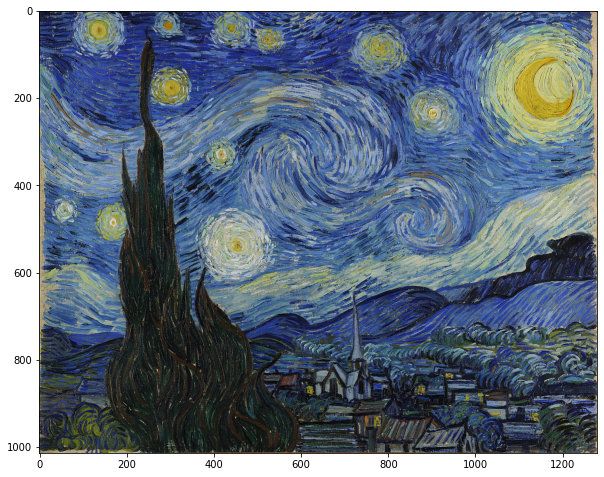

In [ ]:
# Image.open('/content/gdrive/My Drive/1/contents/CT_28246.jpg')
imshow(Image.open('/content/gdrive/My Drive/1/contents/vangogh_starry_night.jpg'))
gcf().set_size_inches(10,10)

## Сравнение 17x4: контент, стилизация 1м, 2м и 3м методами 
Для каждого из 17 контентов [отсюда](https://yadi.sk/d/Yn-9mk4NAsSAKw?w=1). 

In [ ]:
from PIL import Image

In [2]:

# rows = 17
# cols = 4
# axes=[]
# fig=plt.figure(figsize=(40, 900))
# i = -1
# for a in range(rows*cols):
#     axes.append( fig.add_subplot(rows, cols, a+1) )
#     if a%4==0:
#       i+=1
#       subplot_title=("Original")
#     else:
#       subplot_title=("Method "+str(a%4))
#     axes[-1].set_title(subplot_title)  
#     if a%4 != 2:
#       plt.imshow(Image.open('/content/gdrive/My Drive/1/contents/outfile'+ str(a) + '.jpg'))
#     else:
#       plt.imshow(Image.open('/content/gdrive/My Drive/1/contents/results/outfile'+ str(a-2) +'q.jpg'))
# fig.tight_layout()    
# plt.show()
###############THIS IS TOO BIG FILE. SEE IT IN OUTPUT FILES

## Сравнение 17x3: контент, контуры станадртным и модифицированным методом 

In [1]:
# rows = 17
# cols = 3
# axes=[]
# fig=plt.figure(figsize=(40, 100))
# i = -1
# for a in range(rows*cols):
#     # b = np.random.randint(7, size=(height,width))
#     axes.append( fig.add_subplot(rows, cols, a+1) )
#     if a%3==0:
#       i+=1
#       subplot_title=("Original")
#       plt.imshow(list_of_outs[i][a%3][0],'gray')
#     elif a%3 == 1:
#       subplot_title=("Method "+str(a%4))
#       plt.imshow(list_of_outs[i][a%3+1][1],'gray')
#     else:
#       subplot_title=("Method "+str(a%4))
#       plt.imshow(list_of_outs[i][a%3+1][1],'gray')
#     axes[-1].set_title(subplot_title)  
# fig.tight_layout()    
# plt.show()
###################THIS IS TOO BIG FILE. SEE IT IN OUTPUT FILES

## Ваши идеи по [alterdraw.com](https://alterdraw.com) (по желанию)
- комментарии по работе алгоритма, идеи улучшения (это нестандартный алгоритм, стандартный запатентован)
- улучшение дизайна, дополнительные фичи, опечатки и обнаруженные баги (все-таки алгоритм - это меньше 5% от инфраструктуры всего сервиса)
- идеи площадок, где можно было бы продвигать сервис